In [18]:
import winsound
##### UTILITIES #####

def beepStart():
    d = 150
    freq = [2500,3000,3500,4000]
    for i in freq:
        winsound.Beep(i, d)
        
def beepMid():
    d = 100
    freq = [3000,3000,3000]
    for i in freq:
        winsound.Beep(i, d)        
        
def beepEnd():
    d = 150
    freq = [4000,3600,4000,3600]
    for i in freq:
        winsound.Beep(i, d)

In [19]:
import warnings
import pandas as pd 
import numpy as np
import pickle 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations
from itertools import permutations

def acceptanceProbability (bestMSE, newMSE, temp , K):
        # If the new solution is worse, calculate an acceptance probability
        return np.exp( K * (newMSE - bestMSE) / temp)
    
def calcMSE(combDesc, x_train, x_val, y_train, y_val, model):
    x_train_slice = x_train.iloc[:,combDesc]
    x_val_slice = x_val.iloc[:,combDesc]
    model.fit(x_train_slice, y_train)
    y_pred = model.predict(x_val_slice)
    return mean_squared_error(y_val, y_pred)

warnings.filterwarnings('ignore')
unpick_dtTrain = pd.read_pickle("./dtTrain.pkl")
inDt = open("dtTrain.pkl","rb")
dtTrain = pickle.load(inDt)
dtTrain.shape

(74, 73)

In [20]:
descName = unpick_dtTrain.columns.to_list()
descName

['VR1_A',
 'AATS8v',
 'AATS1i',
 'AATS5i',
 'ATSC2dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC2d',
 'ATSC3d',
 'ATSC7d',
 'ATSC7s',
 'ATSC8pe',
 'ATSC2i',
 'ATSC4i',
 'ATSC5i',
 'ATSC7i',
 'ATSC8i',
 'AATSC7m',
 'AATSC7v',
 'PEOE_VSA1',
 'PEOE_VSA2',
 'PEOE_VSA7',
 'PEOE_VSA9',
 'PEOE_VSA10',
 'SMR_VSA5',
 'SlogP_VSA3',
 'EState_VSA3',
 'EState_VSA7',
 'EState_VSA8',
 'EState_VSA9',
 'VSA_EState3',
 'VSA_EState8',
 'VSA_EState9',
 'AATS7i.1',
 'AATS8i.1',
 'ATSC5s.1',
 'AATSC2m.1',
 'AATSC8m.1',
 'AATSC6v.1',
 'VR1_DzZ.1',
 'VE3_Dzv.1',
 'VR2_Dzv.1',
 'VE3_Dzp.1',
 'VR2_Dzi.1',
 'VR1_Dzs',
 'nHBint2',
 'nHBint8',
 'nHBint9',
 'SHBint4',
 'minHBint8',
 'minHBint10',
 'maxHBint10',
 'LipoaffinityIndex',
 'VR1_D.1',
 'WTPT-3',
 'TDB10e',
 'TDB2i',
 'TDB5i',
 'TDB6i',
 'TDB7i',
 'TDB9i',
 'TDB10i',
 'RDF35m',
 'RDF40m',
 'RDF60m',
 'RDF70m',
 'RDF75m',
 'RDF45s',
 'RNCS.1',
 'MDEC-13.2',
 'pIC50']

In [21]:
##### SIMULATED ANNEALING #####

# 0. Preparation Data
train, val = train_test_split(dtTrain, test_size = 0.2, random_state = 45)

x_train = train.iloc[:,:-1]
x_val = val.iloc[:,:-1]
y_train = train.iloc[:, [-1]]
y_val = val.iloc[:,[-1]]

model = LinearRegression()

In [24]:
##### INTO DE SA DE LA'SOIN #####
descNum = 6

initTemp, temp = 100, 100
tempEnd = 0.1
cooling_rate = 0.98
iteration = 5


### 3.1 Initialize solution & Best MSE (Random 6 descriptor)
bestSol = np.random.choice(x_train.shape[1],descNum, replace=False)
bestSol = list(bestSol)
bestSol.sort()
print("Initial Best Descriptors : ", bestSol)

# MSE
bestMSE = calcMSE(bestSol, x_train, x_val, y_train, y_val, model)
print("Initial Best MSE : ", bestMSE)

### 3.3 Simulated Anyeong
bestList = []
bestMSEList = []
sounded = True

print('Loop is Running')
beepStart()
while temp > tempEnd:
    for i in range(iteration):
        
        #Create new solution & new MSE
        newSol = np.random.choice(x_train.shape[1], descNum, replace=False)
        newMSE = calcMSE(newSol, x_train, x_val, y_train, y_val, model)
        deltaMSE = newMSE - bestMSE
        K = (initTemp * np.log(0.8)) / deltaMSE

        if newMSE < bestMSE :
            bestMSE = newMSE
            bestSol = newSol
            bestList.append([bestMSE,bestSol])
        else :
            if acceptanceProbability (bestMSE, newMSE, temp , K) > np.random.rand(0,1):
                bestMSE = newMSE
                bestSol = newSol
                bestList.append([bestMSE,bestSol])

    temp *= cooling_rate
    bestMSEList.append(bestMSE)
    
    if(temp < 50 and sounded):
        sounded = False
        beepMid()
        
print('Loop done!')
beepEnd()

dfBest = pd.DataFrame(bestList)
print('===========================')
print('Best Descriptors : ', dfBest.iloc[-1][1])
print('Best MSE : ', dfBest.iloc[-1][0])

print(bestList[-1][0])
print(bestList[-1][1])

dfBest

# First Best Run
# BestDescriptors=  [31,18,54,36,8,51]
# BestMSE =  0.24519892533514573

# Second Best Run
# Best Descriptors :  [53 61 18 69 36 34]
# Best MSE :  0.22850883728849938

# Best Descriptors :  [40 11  5 67 64 69]
# Best MSE :  0.22858482530945248

# Best Descriptors :  [38 51 55 58 36 18]
# Best MSE :  0.20720460921006825

Initial Best Descriptors :  [3, 17, 19, 44, 52, 57]
Initial Best MSE :  0.7371854210910482
Loop is Running
Loop done!
Best Descriptors :  [63 68 23  3 51  8]
Best MSE :  0.2900271042523092
0.2900271042523092
[63 68 23  3 51  8]


,0,1
0,0.604258,"[55, 31, 51, 57, 16, 2]"
1,0.436390,"[50, 15, 68, 56, 10, 12]"
2,0.420735,"[15, 35, 65, 51, 67, 52]"
3,0.380436,"[32, 16, 69, 18, 60, 45]"
4,0.323590,"[55, 54, 15, 33, 61, 51]"
5,0.290027,"[63, 68, 23, 3, 51, 8]"


In [25]:
bestMSEList

[0.6042576772306406,
 0.6042576772306406,
 0.43639013651824227,
 0.43639013651824227,
 0.43639013651824227,
 0.43639013651824227,
 0.43639013651824227,
 0.43639013651824227,
 0.43639013651824227,
 0.43639013651824227,
 0.4207349390194518,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.38043552416857346,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 0.323590170856623,
 

In [17]:
# bestMSEList
dfBest.columns = ["mse","solution"]
dfBest.sort_values('mse', inplace=True)
dfBest.reset_index(drop=True, inplace= True)
dfBest

,mse,solution
0,0.442518,"[40, 49, 21, 25, 68, 51]"
1,0.559424,"[8, 25, 1, 56, 39, 57]"


In [26]:
# bestSolution = dfBest.loc[0,'solution']
bestSolution = [38, 51, 55, 58, 36, 18]
# bestSolution = list(bestSolution)
bestSolution.sort()
bestSolution

[18, 36, 38, 51, 55, 58]

In [27]:
bestDescriptor = []

for i in bestSolution:
    bestDescriptor.append(descName[i])
bestDescriptor

['ATSC8i', 'AATS8i.1', 'AATSC2m.1', 'minHBint8', 'VR1_D.1', 'TDB2i']

In [28]:
bd = np.asarray(bestDescriptor)
# bd.dump("./bestMSEList_2.pkl")
pickle.dump(bestDescriptor, open('./bestDesc0207.pkl', 'wb'))

In [31]:
# mseNdarray = np.asarray(bestMSEList)
# type(mseNdarray)
# mseNdarray.dump("./bestMSEList_2.pkl")
# dfBest.iloc[-1][1].dump("./bestDesc_2.pkl")
graphList = pickle.load(open('./bestMSEList0207.pkl', 'rb'))
graphList

array([0.5971027 , 0.57105062, 0.57105062, 0.51555026, 0.51555026,
       0.4060763 , 0.37018402, 0.33423683, 0.33423683, 0.33423683,
       0.33423683, 0.33423683, 0.33423683, 0.33423683, 0.33423683,
       0.33423683, 0.33423683, 0.33423683, 0.33423683, 0.33423683,
       0.33423683, 0.33423683, 0.33423683, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641593,
       0.27641593, 0.27641593, 0.27641593, 0.27641593, 0.27641

In [24]:
len(mseNdarray)
np.arange(0,len(mseNdarray),1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

0.5971027013758942


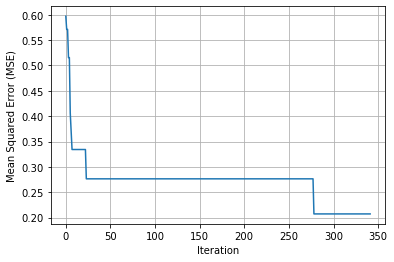

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#define variable x
x = np.arange(0,len(mseNdarray),1)
y = mseNdarray 

#plot the functions
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.plot(x,y)

In [10]:
############## CUSTOMIZED CODE##################################

In [7]:
### Smallest Values before run 20s
bs = [38, 51, 55, 58, 36, 18]
bs.sort()
bs

[18, 36, 38, 51, 55, 58]

In [8]:
bds = []
for i in bs:
    bds.append(descName[i])
bds

['nAtom', 'ATS1dv', 'ATS3dv', 'ATS7d', 'ATS2s', 'ATS5s']

In [9]:
pickle.dump(bds,open('./BestDescriptor.pkl','wb'))